In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
5,Afghanistan,2018,2902.392113,NaN
6,Afghanistan,2017,2952.998916,NaN
7,Afghanistan,2016,2958.785399,NaN
8,Afghanistan,2015,2967.692067,NaN
9,Afghanistan,2014,3017.942544,NaN


In [4]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
8209,Zimbabwe,1999,4238.195198,NaN
8210,Zimbabwe,1998,4342.858177,NaN
8211,Zimbabwe,1997,4304.406272,NaN
8212,Zimbabwe,1996,4271.479930,NaN
8213,Zimbabwe,1995,3935.280057,NaN
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [5]:
# View original column names
gdp_df.describe()

,Year,Value,Value Footnotes
count,8219.000000,8219.000000,0.0
mean,2006.672345,20270.976242,NaN
std,9.782986,22532.004246,NaN
min,1990.000000,510.822823,NaN
25%,1998.000000,4284.868430,NaN
50%,2007.000000,11916.457927,NaN
75%,2015.000000,28543.305542,NaN
max,2023.000000,174339.077325,NaN


In [6]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

In [7]:
rename_mapping = {'Country or Area': 'Country',
                  'Year': 'Year',
                  'Value': 'GDP Per Capita'}

In [8]:
gdp_df = gdp_df.rename(columns=rename_mapping)

There are 8219 rows and 3 columns. Data types are objects, integers and floats.

In [9]:
gdp_df.shape

(8219, 3)

In [10]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP Per Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


There are between 233 and 247 observation for all 34 unique years recorded.

In [11]:
gdp_df.value_counts('Year').count()

np.int64(34)

In [12]:
gdp_df.value_counts('Year')

Year
2014    247
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2013    247
2012    246
2022    246
2011    246
2009    245
2010    245
2008    244
2006    242
2007    242
2004    241
2005    241
2003    241
2002    241
2023    240
2001    240
2000    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1991    234
1993    234
1992    234
1990    233
Name: count, dtype: int64

In [13]:
num_obs_by_country = gdp_df.groupby("Country")["GDP Per Capita"].count().sort_values()
num_obs_by_country

Country
Djibouti                                  11
Turks and Caicos Islands                  13
Sint Maarten (Dutch part)                 15
Faroe Islands                             16
Kosovo                                    16
                                          ..
Heavily indebted poor countries (HIPC)    34
High income                               34
Honduras                                  34
Georgia                                   34
Zimbabwe                                  34
Name: GDP Per Capita, Length: 247, dtype: int64

In [14]:
gdp_df.value_counts('Country').count()

np.int64(247)

In [15]:
gdp_df.value_counts('Country').tail(10)

Country
San Marino                   26
CuraÃ§ao                     24
Afghanistan                  24
Virgin Islands               21
Cayman Islands               18
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, dtype: int64

These countries may be least represented due of thier lack of technology thereby means of communication.

In [16]:
gdp_2021 = gdp_df[gdp_df['Year'] == 2021]

In [17]:
gdp_2021.head()

,Country,Year,GDP Per Capita
2,Afghanistan,2021,2144.166570
26,Africa Eastern and Southern,2021,3934.287267
60,Africa Western and Central,2021,4698.926894
94,Albania,2021,16113.136519
128,Algeria,2021,14496.865470


In [18]:
gdp_2021['GDP Per Capita'].describe()

count       247.000000
mean      24478.517262
std       24601.525764
min         836.665571
25%        5996.532844
50%       15900.976581
75%       37298.776853
max      135379.291201
Name: GDP Per Capita, dtype: float64

This distribution is right skewed.

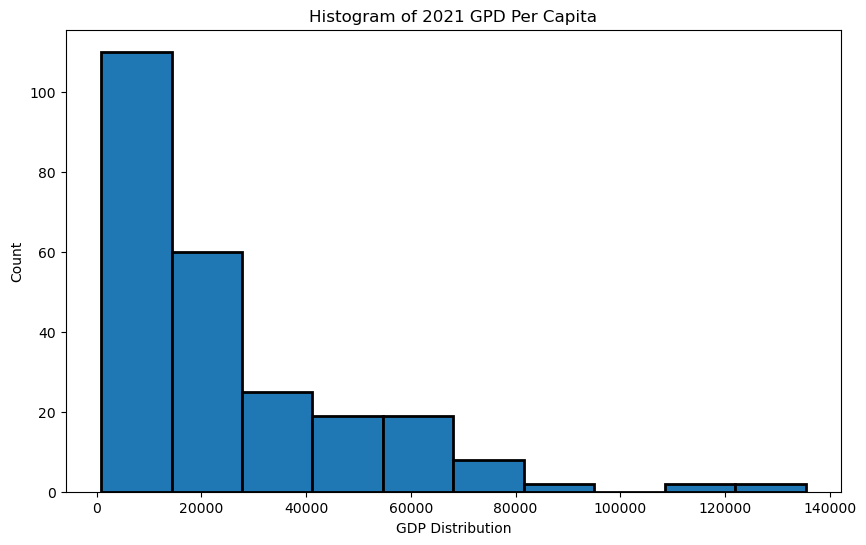

In [19]:
fig,ax = plt.subplots(figsize = (10,6))               

plt.hist(
    data=gdp_2021,
    x='GDP Per Capita',
    edgecolor='black',
    linewidth=2
);                              
plt.xlabel('GDP Distribution')                            
plt.ylabel('Count')
plt.title('Histogram of 2021 GPD Per Capita');

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [20]:
gdp_2021.head(5)

,Country,Year,GDP Per Capita
2,Afghanistan,2021,2144.166570
26,Africa Eastern and Southern,2021,3934.287267
60,Africa Western and Central,2021,4698.926894
94,Albania,2021,16113.136519
128,Algeria,2021,14496.865470


In [21]:
gdp_2021.tail(5)

,Country,Year,GDP Per Capita
8067,Virgin Islands,2021,46893.549699
8089,West Bank and Gaza,2021,5663.121607
8119,World,2021,19637.823230
8153,Zambia,2021,3503.034914
8187,Zimbabwe,2021,3184.785451


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2021 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named `gdp_pivoted`.

In [22]:
gdp_df_1990_2021 = gdp_df[gdp_df['Year'].isin([1990, 2021])]

In [23]:
gdp_pivoted = gdp_df_1990_2021.pivot_table(
    values = 'GDP Per Capita',
    index = 'Country',
    columns = 'Year').dropna(subset = [1990, 2021])

In [24]:
gdp_pivoted.tail(10)

Year,1990,2021
Country,,
United Kingdom,34312.452803,50978.951001
United States,44378.524027,71318.307359
Upper middle income,5934.125381,19230.430577
Uruguay,14106.527502,29441.477487
Uzbekistan,4214.583997,9247.643827
Vanuatu,3101.680551,3135.836649
Viet Nam,2467.964601,12048.901994
World,11207.386344,19637.823230
Zambia,2425.111287,3503.034914


14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [25]:
gdp_pivoted['Percent Change'] = 100 * (gdp_pivoted[2021] - gdp_pivoted[1990]) / gdp_pivoted[1990]

In [26]:
gdp_pivoted

Year,1990,2021,Percent Change
Country,,,
Africa Eastern and Southern,3386.854480,3934.287267,16.163458
Africa Western and Central,3299.401375,4698.926894,42.417559
Albania,5327.747458,16113.136519,202.438069
Algeria,11728.545729,14496.865470,23.603265
Andorra,50036.300776,59332.202910,18.578316
...,...,...,...
Vanuatu,3101.680551,3135.836649,1.101213
Viet Nam,2467.964601,12048.901994,388.212108
World,11207.386344,19637.823230,75.222149


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

Twenty three different countries have experienced a negative shift in GDP from 1990 to 2021.

In [27]:
gdp_pivoted['Negative GDP Change'] = gdp_pivoted['Percent Change'] < 0

In [28]:
print(gdp_pivoted['Negative GDP Change'].sum())

23


In [29]:
# Quick one line solution
(gdp_pivoted['Percent Change'] < 0).sum()

np.int64(23)

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

In [30]:
gdp_sorted_pivot = gdp_pivoted.sort_values('Percent Change', ascending=False)

In [31]:
gdp_sorted_pivot.head(2)

Year,1990,2021,Percent Change,Negative GDP Change
Country,,,,
Equatorial Guinea,1122.817674,16821.448647,1398.146052,False
China,1645.578944,20406.729658,1140.094237,False


In [32]:
equgui = gdp_df[gdp_df['Country'].isin(['Equatorial Guinea'])]

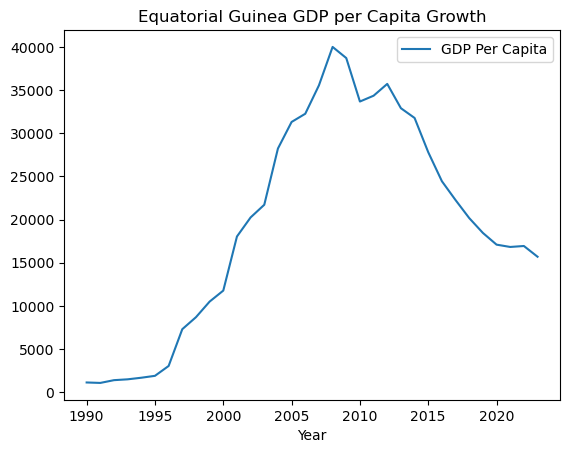

In [33]:
equgui.plot(x='Year', y='GDP Per Capita', kind='line', title= 'Equatorial Guinea GDP per Capita Growth');

In [34]:
china = gdp_df[gdp_df['Country'].isin(['China'])]

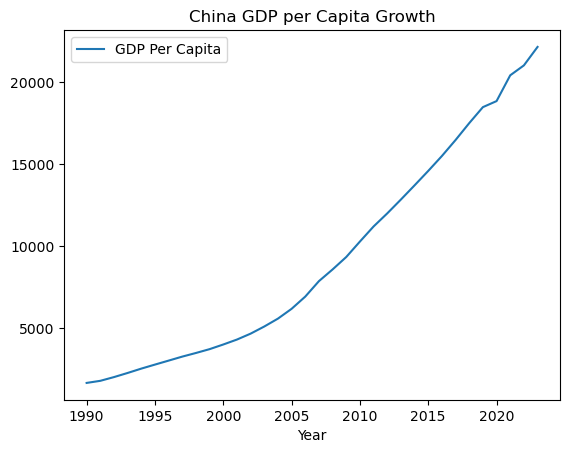

In [35]:
china.plot(x='Year', y='GDP Per Capita', kind='line', title= 'China GDP per Capita Growth');

In [36]:
two_max_gdp_change = gdp_df[gdp_df['Country'].isin(['China','Equatorial Guinea'])]

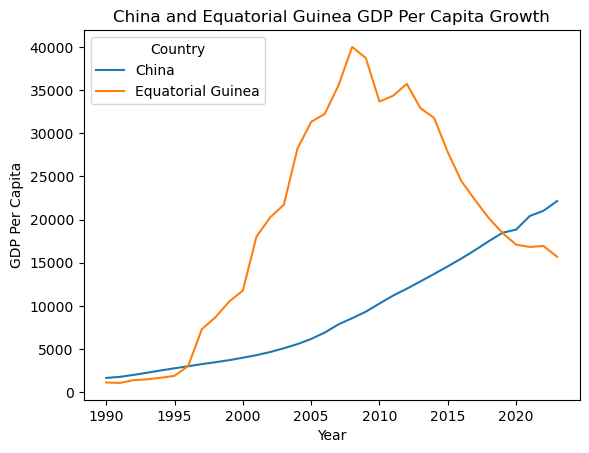

In [37]:
sns.lineplot(
    data = two_max_gdp_change, 
    x = 'Year', 
    y = 'GDP Per Capita', 
    hue = 'Country')
plt.title('China and Equatorial Guinea GDP Per Capita Growth')
plt.ylabel('GDP Per Capita');

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [38]:
continents = pd.read_csv('../data/continents.csv')

In [39]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [40]:
gdp_df = pd.merge(
    gdp_df, 
    continents,
    how='inner', 
    on='Country')

19. Determine the number of countries per continent. Create a bar chart showing this.

In [41]:
gdp_df.groupby('Continent')['Country'].count()

Continent
Africa           1676
Asia             1378
Europe           1492
North America     868
Oceania           475
South America     374
Name: Country, dtype: int64

In [42]:
gdp_df.head()

,Country,Year,GDP Per Capita,Continent
0,Afghanistan,2023,1992.424394,Asia
1,Afghanistan,2022,1981.710168,Asia
2,Afghanistan,2021,2144.166570,Asia
3,Afghanistan,2020,2769.685745,Asia
4,Afghanistan,2019,2927.245144,Asia


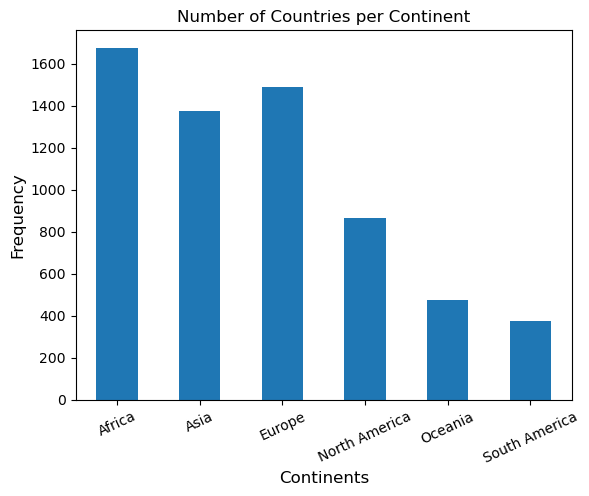

In [43]:
gdp_df.groupby('Continent')['Country'].count().plot(kind='bar', rot= 25, title= 'Number of Countries per Continent')
plt.xlabel('Continents', fontsize=12)
plt.ylabel('Frequency', fontsize=12);

In [44]:
20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

Object `notice` not found.


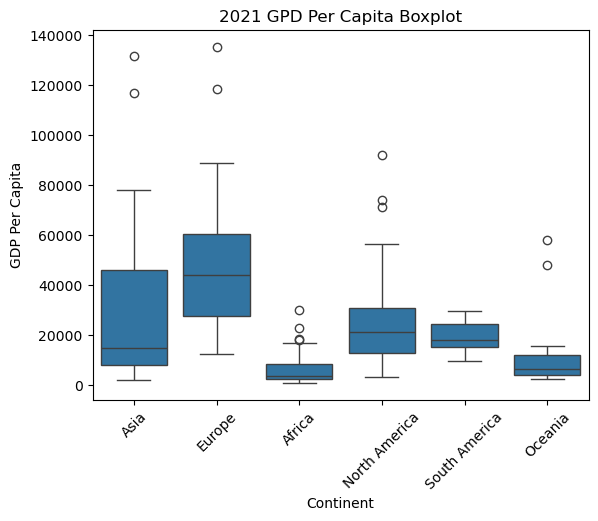

In [45]:
sns.boxplot(
    data=gdp_df[gdp_df['Year'].isin([2021])],
    x='Continent', 
    y='GDP Per Capita'
);
plt.xticks(rotation=45)
plt.ylabel('GDP Per Capita')
plt.title('2021 GPD Per Capita Boxplot');

Europe has the highest average GDP per capita.

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correct this **without modifying the original csv file**.
 

In [46]:
life_expectancy = pd.read_csv('../data/life_expectancy.csv', skiprows=3)
life_expectancy.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.049000,64.215000,64.60200,64.944000,65.303000,65.615000,...,75.540000,75.620000,75.880000,76.019000,75.406000,73.655000,76.22600,76.353000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.169658,44.468838,44.87789,45.160583,45.535695,45.770723,...,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.48702,65.146291,NaN,NaN


22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [47]:
life_expectancy.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')

In [48]:
filter_life_expectancy = life_expectancy.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 69'], axis=1)

In [49]:
filter_life_expectancy.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,64.049000,64.215000,64.602000,64.944000,65.303000,65.615000,66.126000,66.385000,66.744000,...,75.405000,75.540000,75.620000,75.880000,76.019000,75.406000,73.655000,76.226000,76.353000,NaN
1,Africa Eastern and Southern,44.169658,44.468838,44.877890,45.160583,45.535695,45.770723,45.765725,46.440745,46.738632,...,61.713031,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.487020,65.146291,NaN
2,Afghanistan,32.799000,33.291000,33.757000,34.201000,34.673000,35.124000,35.583000,36.042000,36.510000,...,62.270000,62.646000,62.406000,62.443000,62.941000,61.454000,60.417000,65.617000,66.035000,NaN
3,Africa Western and Central,37.779636,38.058956,38.681792,38.936918,39.194580,39.479784,39.719248,39.529359,40.258890,...,56.038336,56.392452,56.626439,57.036976,57.149847,57.364425,57.362572,57.987813,58.855722,NaN
4,Angola,37.933000,36.902000,37.168000,37.419000,37.704000,37.968000,38.258000,38.616000,38.968000,...,61.042000,61.619000,62.122000,62.622000,63.051000,63.116000,62.958000,64.246000,64.617000,NaN


In [50]:
life_expectancy_melt = filter_life_expectancy.melt(
    id_vars= 'Country Name',
    value_name= 'Life Expectancy',
    var_name= 'Year')

In [51]:
life_expectancy_df = life_expectancy_melt.rename(columns={ 'Country Name' : 'Country'})

In [52]:
life_expectancy_df.head()

,Country,Year,Life Expectancy
0,Aruba,1960,64.049000
1,Africa Eastern and Southern,1960,44.169658
2,Afghanistan,1960,32.799000
3,Africa Western and Central,1960,37.779636
4,Angola,1960,37.933000


23. What was the first country with a life expectancy to exceed 80?

In [53]:
print(life_expectancy_df[life_expectancy_df['Life Expectancy'] > 80].sort_values('Year').iloc[0])

Country            Monaco
Year                 1992
Life Expectancy    80.065
Name: 8661, dtype: object


24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [54]:
gdp_df.head()

,Country,Year,GDP Per Capita,Continent
0,Afghanistan,2023,1992.424394,Asia
1,Afghanistan,2022,1981.710168,Asia
2,Afghanistan,2021,2144.166570,Asia
3,Afghanistan,2020,2769.685745,Asia
4,Afghanistan,2019,2927.245144,Asia


In [55]:
life_expectancy_df.head()

,Country,Year,Life Expectancy
0,Aruba,1960,64.049000
1,Africa Eastern and Southern,1960,44.169658
2,Afghanistan,1960,32.799000
3,Africa Western and Central,1960,37.779636
4,Angola,1960,37.933000


In [56]:
gdp_df['Year']= gdp_df['Year'].astype(str)

In [57]:
life_expectancy_df['Year'] = life_expectancy_df['Year'].astype(str)

In [58]:
gdp_le = pd.merge(gdp_df, life_expectancy_df,
how='inner', on=['Country', 'Year'])

In [59]:
gdp_le.head(), gdp_le.tail()

(       Country  Year  GDP Per Capita Continent  Life Expectancy
 0  Afghanistan  2023     1992.424394      Asia           66.035
 1  Afghanistan  2022     1981.710168      Asia           65.617
 2  Afghanistan  2021     2144.166570      Asia           60.417
 3  Afghanistan  2020     2769.685745      Asia           61.454
 4  Afghanistan  2019     2927.245144      Asia           62.941,
        Country  Year  GDP Per Capita Continent  Life Expectancy
 5851  Zimbabwe  1994     3965.730986    Africa           52.537
 5852  Zimbabwe  1993     3634.750494    Africa           53.976
 5853  Zimbabwe  1992     3649.891947    Africa           55.602
 5854  Zimbabwe  1991     4126.405247    Africa           57.037
 5855  Zimbabwe  1990     4013.299059    Africa           58.319)

25. Create a new DataFrame, named `gdp_le_2021` by extracting data for the year 2021 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2021?

In [60]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == '2021'].copy()

In [61]:
gdp_le_2021.head()

,Country,Year,GDP Per Capita,Continent,Life Expectancy
2,Afghanistan,2021,2144.166570,Asia,60.417
26,Albania,2021,16113.136519,Europe,76.844
60,Algeria,2021,14496.865470,Africa,75.208
94,Andorra,2021,59332.202910,Europe,82.331
128,Angola,2021,7408.126591,Africa,62.958


In [62]:
(gdp_le_2021['Life Expectancy'] >= 80).sum()

np.int64(33)

26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [63]:
top3_2021 = gdp_le_2021.nlargest(3, 'GDP Per Capita') 

In [64]:
top3_2021.head()

,Country,Year,GDP Per Capita,Continent,Life Expectancy
3061,Luxembourg,2021,135379.291201,Europe,82.597561
4673,Singapore,2021,131864.092336,Asia,83.092683
2434,Ireland,2021,118594.746862,Europe,82.253659


In [65]:
top3 = gdp_le[gdp_le['Country'].isin(['Luxembourg', 'Singapore', 'Ireland'])].copy()

In [66]:
top3['Year'] = top3['Year'].astype('int')

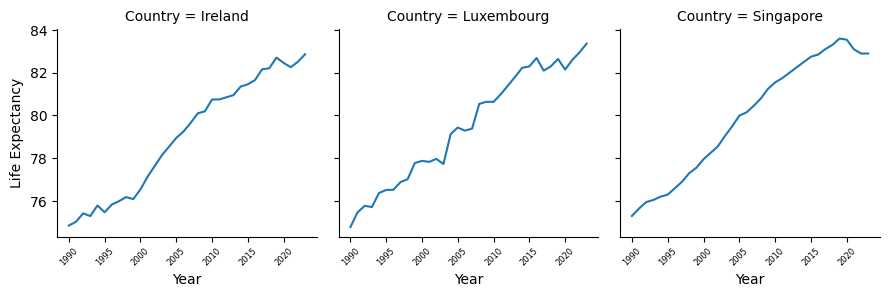

In [67]:
g = sns.FacetGrid(data = top3, col= 'Country',  sharey=True)
g.map_dataframe(sns.lineplot, x='Year', y='Life Expectancy')
g.tick_params(axis='x', rotation = 45, labelsize = 6);

In [68]:
top3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 2432 to 4704
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          102 non-null    object 
 1   Year             102 non-null    int64  
 2   GDP Per Capita   102 non-null    float64
 3   Continent        102 non-null    object 
 4   Life Expectancy  102 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.8+ KB


27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

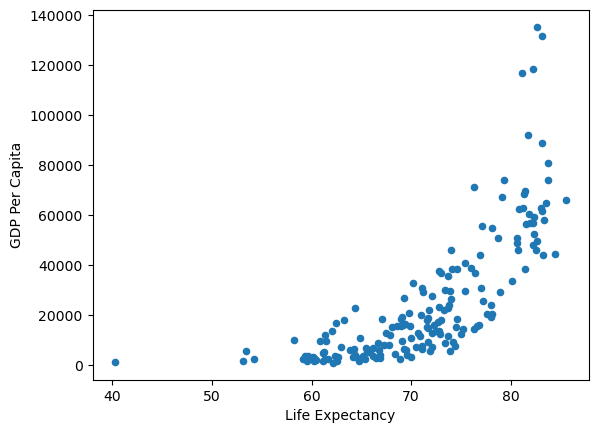

In [69]:
gdp_le_2021.plot(
    kind="scatter",
    y="GDP Per Capita",
    x="Life Expectancy"
);

There is a poitive correlation between GDP per Capita and Life Expectancy.

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

In [70]:
gdp_le_2021[['Life Expectancy', 'GDP Per Capita']].corr()

,Life Expectancy,GDP Per Capita
Life Expectancy,1.000000,0.752785
GDP Per Capita,0.752785,1.000000


There is a positive correlation.

29. Add a column to `gdp_le_2021` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [71]:
gdp_le_2021['Log GDP Per Capita'] = np.log(gdp_le_2021['GDP Per Capita'])

In [72]:
gdp_le_2021[['Life Expectancy', 'Log GDP Per Capita']].corr()

,Life Expectancy,Log GDP Per Capita
Life Expectancy,1.000000,0.849065
Log GDP Per Capita,0.849065,1.000000


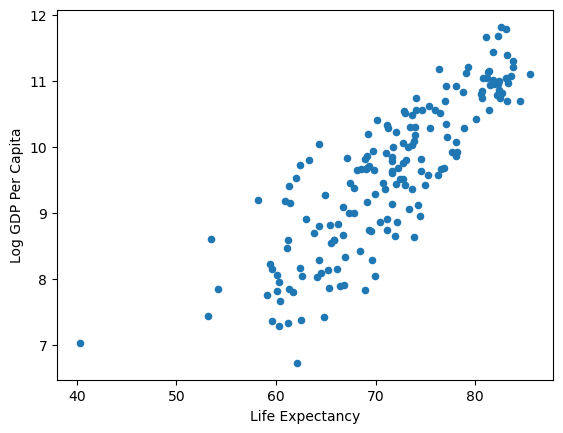

In [73]:
gdp_le_2021.plot(
    kind="scatter",
    y="Log GDP Per Capita",
    x="Life Expectancy"
);

### Bonus: Solo Exploration:
1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find. 

In [74]:
interest_rates = pd.read_csv('../data/interest_rates.csv')
interest_rates.head(2)

,OID,Country or Area,Year,Description,Magnitude,Value
0,51260K.FZF...,"AFGHANISTAN, I.R. OF",2009,SAVINGS RATE (FOREIGN CURRENCY),PERCENT PER ANNU,4.2750
1,51260K..ZF...,"AFGHANISTAN, I.R. OF",2009,SAVINGS RATE,PERCENT PER ANNU,7.0775


2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).

In [75]:
gdp_df.shape

(6263, 4)